In [1]:
import tweepy,re
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
consumerKey = 'GVyLjFOV2ppDfZeUZvyjE7VZk'
consumerSecret = 'y0p4oSMgKsNEMNItfwtXtqFJUOiVSnFzZoYtSs5V7iWxVazgdP'
accessToken = '1547829056262922240-l7BX0F3YbN2C3H6VcTM7yLhSa96n6d'
accessTokenSecret = '994JBJmOYo8vEUVtqiquAaPI3Qq3AzIxGRfOCxmkESt6M'
auth = tweepy.OAuthHandler(consumerKey,consumerSecret)
auth.set_access_token(accessToken,accessTokenSecret)
api = tweepy.API(auth)

In [3]:
searchTerm = input('enter: ')
NoOfTerms = int(input('how many: '))

tweets = []
tweetText = []

tweets = tweepy.Cursor(api.search_tweets, q =searchTerm+" -filter:retweets", lang = "en").items(NoOfTerms)

enter: Shahrukh Khan
how many: 300


In [4]:
tweet_list = [tweet.text for tweet in tweets]
tweet_df = pd.DataFrame(tweet_list)

In [5]:
tweet_df

,0
0,Watch: Shehnaaz Gill grooves to this Shah Rukh...
1,NEW IG REEL \nBabieee continues with Shahrukh ...
2,#ShehnaazGiII recreates a scene from this #Sha...
3,Two greatest assets of our country all sanghis...
4,@SRKz_Knight @SandipB28369874 @iamsrk Love you...
...,...
295,@99Locus I mean it doesnt matter only if its s...
296,#SRK #NadiaNadim #Bollywood Nadia Nadim Reveal...
297,Would people be as crazed about PS-1 if they h...
298,@developingpak If i would be there i wouldn't ...


## Cleaning Data

- We have already scraped data from twitter and changed the tweets in the form of a dataframe.
- It’s time to clean the data.
- First define a function to clean the dataset.

In [11]:
def clean_data(text):
    return ' '.join(re.sub("(@[a-zA-Z0-9]+)|([^0-9A-Za-z])|(https:\/\/[\w.]+\/[\w]+)"," ", text).split())
tweet_df['cleaned_data'] = tweet_df[0].apply(clean_data)

- Regular expressions are must for text analysis.
- We will use the sub() function to replace all the words starting with @, text which does not contain numbers or alphabets, and links with space and then joined the rest of the text again.
- Apply this function to the data and check if it worked or not. And see that the data has been somewhat cleaned.

In [15]:
tweet_df.head()

,0,cleaned_data
0,Watch: Shehnaaz Gill grooves to this Shah Rukh...,Watch Shehnaaz Gill grooves to this Shah Rukh ...
1,NEW IG REEL \nBabieee continues with Shahrukh ...,NEW IG REEL Babieee continues with Shahrukh Kh...
2,#ShehnaazGiII recreates a scene from this #Sha...,ShehnaazGiII recreates a scene from this ShahR...
3,Two greatest assets of our country all sanghis...,Two greatest assets of our country all sanghis...
4,@SRKz_Knight @SandipB28369874 @iamsrk Love you...,Knight Love you Mr Shahrukh Khan


- But still there is a lot more to do. We must clean the text data properly before applying any machine learning model.
- You will remove numbers from the text.To do so, again you need to define a function which will drop numbers from the text.

In [16]:
def drop_numbers(list_text):
    list_text_new = []
    
    for i in list_text:
        if not re.search('\d',i):
            list_text_new.append(i)
    return ''.join(list_text_new)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(drop_numbers)

- Now, after defining the function you will apply it to the data.
- Looking at the output, you can observe that all the numbers have been removed from the tweets.

In [17]:
tweet_df.head()

,0,cleaned_data
0,Watch: Shehnaaz Gill grooves to this Shah Rukh...,Watch Shehnaaz Gill grooves to this Shah Rukh ...
1,NEW IG REEL \nBabieee continues with Shahrukh ...,NEW IG REEL Babieee continues with Shahrukh Kh...
2,#ShehnaazGiII recreates a scene from this #Sha...,ShehnaazGiII recreates a scene from this ShahR...
3,Two greatest assets of our country all sanghis...,Two greatest assets of our country all sanghis...
4,@SRKz_Knight @SandipB28369874 @iamsrk Love you...,Knight Love you Mr Shahrukh Khan


- We are halfway through the cleaning process.
- Now it’s time for the lemmatization process but before that you will convert all words to lowercase.
- For that again, define a function and convert everything to lowercase.

In [18]:
# changing all the words of the review column to lowercase letters

def lower_case(text):
    text_word = word_tokenize(text)
    text_word_lower = [i.lower() for i in text_word]
    return ' '.join(text_word_lower)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(lower_case)

In [19]:
tweet_df.head()

,0,cleaned_data
0,Watch: Shehnaaz Gill grooves to this Shah Rukh...,watch shehnaaz gill grooves to this shah rukh ...
1,NEW IG REEL \nBabieee continues with Shahrukh ...,new ig reel babieee continues with shahrukh kh...
2,#ShehnaazGiII recreates a scene from this #Sha...,shehnaazgiii recreates a scene from this shahr...
3,Two greatest assets of our country all sanghis...,two greatest assets of our country all sanghis...
4,@SRKz_Knight @SandipB28369874 @iamsrk Love you...,knight love you mr shahrukh khan


- After converting the text to lowercase, it’s time for the lemmatization process.
- Lemmatization is the process of converting a word to its base form.
- Lemmatization considers the context and converts the word to its meaningful base form.
- For example, “good” and “better”, you have these two words. With lemmatization, “better” is converted to its root form, that is, “good”.
- Both words mean the same thing. So you convert them to the base word.

In [21]:
lemmatizer = WordNetLemmatizer()
def lemmatise(text):
    text_tokens = word_tokenize(text)
    text_words_lemma = [lemmatizer.lemmatize(i) for i in text_tokens]
    return " ".join(text_words_lemma)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(lemmatise)

In [25]:
tweet_df['cleaned_data'].values

array(['watch shehnaaz gill groove to this shah rukh khan song in goofy video',
       'new ig reel babieee continues with shahrukh khan song cutest munchkin gill go watch on a loo',
       'shehnaazgiii recreates a scene from this shahrukhkhan movie baazigar bollywood instagram reel',
       'two greatest asset of our country all sanghis are insecure of taj mahal and shahrukh khan',
       'knight love you mr shahrukh khan',
       'hamid ansari umar khalid aamir khan shahrukh khan mohd zubair shajeel imam siddique kappan they can blame these',
       'shahrukh khan jaisa hakla aaj biggest superstar of indian cinema hai world nd richest',
       'he only man who deserve king name that is shahrukh khan he is the man who made famous bollywood globallly',
       'shahrukh khan mocking arnab goswami and alia bhatt s evil laughter',
       'shahrukh khan mocking arnab goswami and alia bhatt s evil laughter boycottbollywood',
       'do u know the incident of shahrukh khan india demanded ap

- Analyze the text carefully to observe what changes are made.
- Now the next and the last step to clean the data is to remove stop words from it.
- Stop words are the English words that do not add much value to the sentences. They can be safely ignored without sacrificing the meaning of the sentence. For example: The words such as :- the, he, she, is etc. are stop words.
- To remove such words from the text data define a function and remove all the stop words from the text.

In [26]:
def remove_stopwords(text):
    text_tokens = word_tokenize(text)
    tokens = [word for word in text_tokens if not word in set(stopwords.words('english')) ]
    token_text = ' '.join(tokens)
    return token_text

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(remove_stopwords)

In [27]:
tweet_df.head()

,0,cleaned_data
0,Watch: Shehnaaz Gill grooves to this Shah Rukh...,watch shehnaaz gill groove shah rukh khan song...
1,NEW IG REEL \nBabieee continues with Shahrukh ...,new ig reel babieee continues shahrukh khan so...
2,#ShehnaazGiII recreates a scene from this #Sha...,shehnaazgiii recreates scene shahrukhkhan movi...
3,Two greatest assets of our country all sanghis...,two greatest asset country sanghis insecure ta...
4,@SRKz_Knight @SandipB28369874 @iamsrk Love you...,knight love mr shahrukh khan


- After applying it to the data, now we can observe that all the stop words have been removed from the text data.
- Now our text data is ready and clean.
- We are good to create a Sentiment Analyzer Engine.

## Sentiment Analysis

- We are going to use the library called “textblob” to find the sentiment of the tweets.
- Textblob has a function called “sentiment” which returns polarity and subjectivity.
- We are interested only in polarity for now.

- Polarity is the expression which determines the sentimental aspect of an opinion. The sentiment polarity can be determined as positive, negative and neutral.

- Polarity lies between minus one to plus one. Where plus one means the positive sentiment,  Minus one means the negative sentiment and, Zero means the neutral sentiment.

In [28]:
# Lets calculate the polarity of the reviews

def calculate_polarity(text):
    textblob = TextBlob(str(text))
    pol = textblob.sentiment.polarity
    if (pol == 0):
        return 'Neutral'
    elif (pol > 0 and pol <= 0.3):
        return 'Weakly Positive'
    elif (pol > 0.3 and pol <= 0.6):
        return 'Positive'
    elif (pol > 0.6 and pol <= 1):
        return 'Strongly Positive'
    elif (pol > -0.3 and pol <= 0):
        return 'Weakly Negative'
    elif (pol > -0.6 and pol <= -0.3):
        return 'Negative'
    elif (pol > -1 and pol <= -0.6):
        return 'Strongly Negative'
    
tweet_df['polarity'] = tweet_df['cleaned_data'].apply(calculate_polarity)

In [29]:
tweet_df.polarity.value_counts()

Neutral              129
Positive              57
Weakly Positive       56
Strongly Positive     23
Weakly Negative       15
Negative              13
Strongly Negative      4
Name: polarity, dtype: int64

- Looking at the output,we can see that we have got the sentiment of each and every tweet.

- Now, we will also find out the average reaction of all the people.
- To do so, we will calculate the total number of tweets with negative, positive, weakly positive etc. sentiment and will also find out the total polarity of all the tweets.

In [31]:
neutral = 0 
wpositive = 0
spositive = 0
positive = 0
wnegative = 0
snegative = 0
negative = 0
polarity = 0

for i in range(0,300):
    textblob = TextBlob(str(tweet_df['cleaned_data'][i]))
    polarity += textblob.sentiment.polarity
    pol = textblob.sentiment.polarity
    if (pol == 0):
        neutral +=1
    elif (pol > 0 and pol <= 0.3):
        wpositive +=1
    elif (pol > 0.3 and pol <= 0.6):
        positive +=1
    elif (pol > 0.6 and pol <= 1):
        spositive +=1
    elif (pol > -0.3 and pol <= 0):
        wnegative += 1
    elif (pol > -0.6 and pol <= -0.3):
        negative += 1
    elif (pol > -1 and pol <= -0.6):
        snegative += 1
        

- After executing this code, find out the average reaction. We have the total number of tweets with us and the total polarity of all the tweets.
- To find out the average polarity, we just need to divide the total polarity by the number of tweets. And here we get the average reaction on all the tweets.

In [32]:
polarity = polarity/NoOfTerms
polarity

0.13139538840788845

- Similarly, we can find out the percentage of people reacting positively, negatively etc.
- For this, we create a function to find out the percentage and then calculate the percentage of all the reactions.

In [33]:
def percentage(part, whole):
    temp = 100 * float(part) / float(whole)
    return format(temp, '.2f')

In [39]:
# finding the average of how people are reacting

neutral = percentage(neutral, NoOfTerms) 
wpositive = percentage(wpositive, NoOfTerms) 
spositive = percentage(spositive, NoOfTerms) 
positive = percentage(positive, NoOfTerms) 
wnegative = percentage(wnegative, NoOfTerms) 
snegative = percentage(snegative, NoOfTerms) 
negative = percentage(negative, NoOfTerms) 

In [55]:
negative

'4.33'

- We have already calculated the polarity of each and every tweet and now it’s time to print our results.
- First print the general report which is:- what is the general reaction of all the people reacting to the searched term, which we calculated by using the total polarity divided by the number of tweets.
- And then the detailed report:- What percentage of tweets are positive, what percentage of tweets are weakly positive, and so on.

In [56]:
# printing the data
print("How people are reacting on " + searchTerm + " by analysing " + str(NoOfTerms) + " tweets.")
print()
print("-------------------------------------------------------------------------------------------")
print()
print('General Report: ')

if (polarity == 0):
    print('Neutral')
elif (polarity > 0 and polarity <= 0.3):
    print('Weakly Positive')
elif (polarity > 0.3 and polarity <= 0.6):
    print('Positive')
elif (polarity > 0.6 and polarity <= 1):
    print('Strongly Positive')
elif (polarity > -0.3 and polarity <= 0):
    print('Weakly Negative')
elif (polarity > -0.6 and polarity <= -0.3):
    print('Negative')
elif (polarity > -1 and polarity <= -0.6):
    print('Strongly Negative')
    
print()
print("--------------------------------------------------------------------------------------------")
print()
print('Detailed Report: ')
print(str(positive) + "% people thought it was positive")
print(str(wpositive) + "% people thought it was weakly positive")
print(str(spositive) + "% people thought it was strongly positive")
print(str(negative) + "% people thought it was negative")
print(str(wnegative) + "% people thought it was weakly negative")
print(str(snegative) + "% people thought it was strongly negative")
print(str(neutral) + "% people thought it was neutral")

How people are reacting on Shahrukh Khan by analysing 300 tweets.

-------------------------------------------------------------------------------------------

General Report: 
Weakly Positive

--------------------------------------------------------------------------------------------

Detailed Report: 
19.00% people thought it was positive
18.67% people thought it was weakly positive
7.67% people thought it was strongly positive
4.33% people thought it was negative
5.00% people thought it was weakly negative
1.33% people thought it was strongly negative
43.00% people thought it was neutral


In [57]:
sizes = [positive,wpositive,spositive,neutral,negative,wnegative,snegative]
colors = ['yellowgreen','lightgreen','darkgreen','gold','red','lightsalmon','darkred']
labels = ['Positive [' + str(positive)+ '%]',
         'Weakly Positive [' + str(wpositive)+ '%]',
         'Strongly Positive [' + str(spositive)+ '%]',
         'Neutral [' + str(neutral)+ '%]',
         'Negative [' + str(negative)+ '%]',
         'Weakly Negative [' + str(wnegative)+ '%]',
         'Strongly Negative [' + str(snegative)+ '%]'
         ]

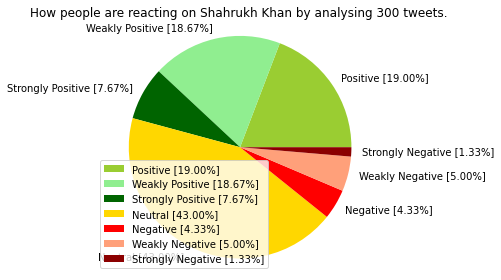

In [58]:
plt.pie(sizes,labels=labels,colors=colors)
plt.legend(labels,loc= 'best')
plt.title("How people are reacting on " + searchTerm + " by analysing " + str(NoOfTerms) + " tweets.")
plt.axis('equal')
plt.tight_layout()
plt.show()

- From the above graph we could see 43% reviews are Neutral (i.e polarity of the reviews is 0).
- 18.67% reviews are Weakly positive (i.e polarity of the reviews is between 0 to 0.3)
- 19% reviews are Positive (i.e polarity of the reviews is between 0.3 to 0.6)